<a href="https://colab.research.google.com/github/Sheulynath/Assignment/blob/X-Ray-image-or-not/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 154_jpeg.rf.2f4887d7e810d71d451d738848fd9f08.jpg to 154_jpeg.rf.2f4887d7e810d71d451d738848fd9f08.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Xray_Classifier/test'    # Update with your actual path

In [12]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/non_xray')))

565
500
565
500


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 853 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [20]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [22]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [23]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
27/27 [==============================] - 351s 13s/step - loss: 2.5015 - accuracy: 0.5346 - val_loss: 1.1297 - val_accuracy: 0.4906
Epoch 2/3
27/27 [==============================] - 310s 12s/step - loss: 0.5447 - accuracy: 0.7163 - val_loss: 0.6418 - val_accuracy: 0.6981
Epoch 3/3
27/27 [==============================] - 321s 12s/step - loss: 0.3334 - accuracy: 0.8781 - val_loss: 0.4658 - val_accuracy: 0.8066


In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 853 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


In [25]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [26]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [27]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [33]:
history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
27/27 [==============================] - 322s 12s/step - loss: 0.3679 - accuracy: 0.8288 - val_loss: 0.4441 - val_accuracy: 0.8160
Epoch 2/10
27/27 [==============================] - 297s 11s/step - loss: 0.3257 - accuracy: 0.8523 - val_loss: 0.3350 - val_accuracy: 0.8726
Epoch 3/10
27/27 [==============================] - 322s 12s/step - loss: 0.2313 - accuracy: 0.9156 - val_loss: 0.2851 - val_accuracy: 0.8774
Epoch 4/10
27/27 [==============================] - 321s 12s/step - loss: 0.2122 - accuracy: 0.9273 - val_loss: 0.2606 - val_accuracy: 0.9009
Epoch 5/10
27/27 [==============================] - 321s 12s/step - loss: 0.2091 - accuracy: 0.9285 - val_loss: 0.3041 - val_accuracy: 0.8821
Epoch 6/10
27/27 [==============================] - 320s 12s/step - loss: 0.2057 - accuracy: 0.9250 - val_loss: 0.2230 - val_accuracy: 0.9198
Epoch 7/10
27/27 [==============================] - 319s 12s/step - loss: 0.1793 - accuracy: 0.9402 - val_loss: 0.2029 - val_accuracy: 0.9340
Epoch 

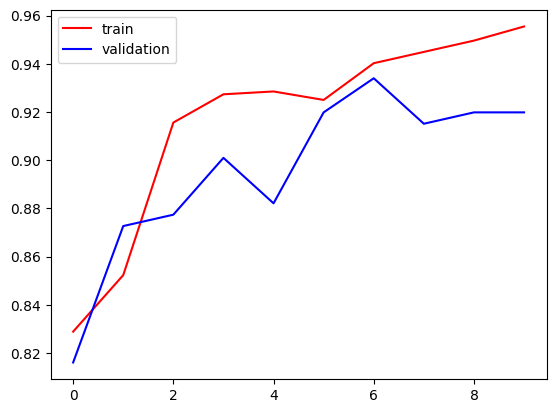

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

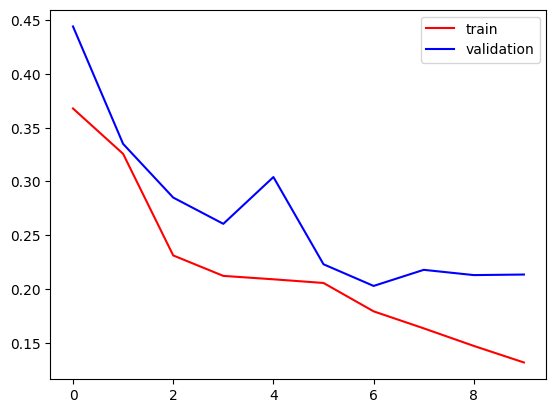

In [35]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1064 images belonging to 2 classes.


In [37]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

34/34 [==============================] - 132s 4s/step
[[0.5087228 ]
 [0.5031333 ]
 [0.50491875]
 ...
 [0.5176095 ]
 [0.50990105]
 [0.5169677 ]]


In [38]:
len(predictions)

1064

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[  0 500]
 [  0 564]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.53      1.00      0.69       564

    accuracy                           0.53      1064
   macro avg       0.27      0.50      0.35      1064
weighted avg       0.28      0.53      0.37      1064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
